Marty Henderson
mhend22@wgu.edu
C744 - Data Mining and Analysis II

## I. Tool Selection

Although all three of SAS, R, and Python have benefits over one another, I elected to go with Python. SAS has a strong ability to quickly analyze numbers, especially their web-based OnDemand version, and R is heavily used in Academic Research. However, Python is commonly found in commerical and corporate applications due to its ease of programming and free usage. Python's strongest suit, and primary reason I selected it, is because of the Jupyter notebooks. R offers RMarkdown, that does a similar output, but is not as intuitive to program in. By using Jupyter notebooks, I can write both the documentation and the code simultaneously. This makes this projet significantly easier to complete and increases overall readability and repetition.

The goal for this project appears to be simple on the surface - how do we predict someone will "churn" or leave the company for another company or service. Ideally, a company wants to keep as many customers as possible while gaining new ones. This data can be used for targeted marketing, creating new offers, or predicting if a new operational change could cause customers to leave. 

I will use two overall statisitcal methods to discover what kind of causes may impact a customer's decision to churn. It will not be perfect, as I do not have perfect data nor can I get every nuance in any model, but it will give an overall likelihood.

The first, and descriptive, statistical method I will use is hierarchal clustering. There are many potential relationships between the factors, and this will show groups that trend the same. For purposes outside of the scope of this, it could be used for targeted marketing, however, for this it will give us big swaths of customers that might churn.

The second, and non-descriptive predictive, statistical method I will use is linear regression. This common technique will help determine the weight of each factor in producing a binary output - in this case, churn or not.


## II. Data Exploration and Preparation

The main goal of the exploration and preparation is to find out if any variables are missing or would otherwise skew my results. The biggest pieces I am trying to predict are churn, and both of my statitical methods are using binary inputs to determine whether or not a customer is likely to churn. Therefore, we will remove or impute every variable until there is strictly binary options.

Initially, I load three libraries - pandas for dataframe usage, numpy for manipulation of arrays and similar, and matplotlib for the ability to draw graphs as needed.

At this time, I also load the raw data into a dataframe for exploration. I have renamed the file to shorter name while not changing any part of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data_churn = pd.read_csv('Churn_raw.csv')

The variable I am trying to predict is "Churn", which is a binary true/false, stated as "Yes" and "No", variable. Every instance of the variable is either Yes (True, they did leave the company) or No (False, they stayed with the company).

In [2]:
#This code prints out the count of each value of the "Churn" column, which is the target variable
print(raw_data_churn.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


However, there are several columns that could be used to drive towards this Yes or No response. 

In [3]:
#This prints out the columns of the raw file
for a in raw_data_churn.columns.values:
    print(a)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


The column "customerID" is a unique identifier of a customer, and Churn is the target variable, and all the rest of the columns could be independent variable. In this data set, there are no duplicate customerIDs. The describe function, below, shows the number of observations as "count" and the number of unique Customer ID as "unique"

In [4]:
#The first one prints the number of customerIDs
print(raw_data_churn.customerID.describe())

count           7043
unique          7043
top       3874-EQOEP
freq               1
Name: customerID, dtype: object


As we look at a small sample of the data itself, we can see each column has a few different ways of answering which variable is which, such as 0/1 for Senior Citizen, Yes/No for Partner, Dependents, Phone Service, Online Security, Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing, and Churn, and others with multiple potential values, such as Payment Method, Monthly Charges, Multiple Lines, Tenure, Internet Service, and Total Charges.

In [5]:
raw_data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


By removing the customerID, tenure, Monthly Charges, and Total Charges we can get closer to our clean dataset. This will allow us to explore the other, soon-to-be-binary variables more closely, and remove ones with continuous values.

In [6]:
#removes the columns we no longer want, and stores it as a new dataframe, clean_df
clean_df = raw_data_churn.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
#this gives a sample of what it looks like
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


Next is to convert the ones that are trinary and larger into binary options.

These columns are already binary:

Gender (Male/Female)
Senior Citizen (0/1)
Partner (Yes/No)
Dependents (Yes/No)
Online Security (Yes/No)
Online Backup (Yes/No)
Device Protection (Yes/No)
Tech Support (Yes/No)
Streaming TV (Yes/No)
Streaming Movies (Yes/No)
Paperless Billing (Yes/No)
Churn (Yes/No) - our target variable

These columns need converting:

Multiple Lines

In [7]:
print(clean_df.MultipleLines.unique())

['No phone service' 'No' 'Yes']


Internet Service

In [8]:
print(clean_df.InternetService.unique())

['DSL' 'Fiber optic' 'No']


Contract

In [9]:
print(clean_df.Contract.unique())

['Month-to-month' 'One year' 'Two year']


and Payment Method

In [10]:
print(clean_df.PaymentMethod.unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


To convert these, we will look at a way of making them yes or no

For multiple lines, 'No phone service' is the same as a no. Using an lambda we can convert all the non-yes answers to 'No;

In [11]:
clean_df['MultipleLines'] = clean_df['MultipleLines'].apply(lambda x: True if x == 'Yes' else False)

For Internet Service, I can call both Fiber Optic and DSL as "True" for internet, where No would be a false statement

In [12]:
clean_df['InternetService'] = clean_df['InternetService'].apply(lambda x: False if x == 'No' else True)

For contract, I will be making a new column more clearly labelled "In Contract". If someone is in a One-Year or Two-Year contract, they will be True, otherwise for Month-to-Month, they will be labelled false.

In [13]:
clean_df['InContract'] = clean_df['Contract'].apply(lambda x: False if x == 'Month-to-month' else True)

Similar to contract, payment method will be divided by Automatic or not, in a new column called 'AutomaticPayment'. This is a quick determination simply by if the payment method contains the word 'automatic'

In [14]:
clean_df['AutomaticPayment'] = clean_df['PaymentMethod'].apply(lambda x: True if 'automatic' in x else False)

I will also clean SeniorCitizen for 1 to be True, and 0 to be false

In [15]:
clean_df['SeniorCitizen'] = clean_df['SeniorCitizen'].apply(lambda x: True if x == 1 else False)

Much like the new In Contract column, I will convert gender to IsFemale, with another True for female, and False for male

In [16]:
clean_df['IsFemale'] = clean_df['gender'].apply(lambda x: True if x == 'Female' else False)

I will also convert the remaining columns from Yes/No to True/False

In [17]:
clean_df['Partner'] = clean_df['Partner'].apply(lambda x: True if x == 'Yes' else False)
clean_df['Dependents'] = clean_df['Dependents'].apply(lambda x: True if x == 'Yes' else False)
clean_df['PhoneService'] = clean_df['PhoneService'].apply(lambda x: True if x == 'Yes' else False)
clean_df['OnlineSecurity'] = clean_df['OnlineSecurity'].apply(lambda x: True if x == 'Yes' else False)
clean_df['OnlineBackup'] = clean_df['OnlineBackup'].apply(lambda x: True if x == 'Yes' else False)
clean_df['DeviceProtection'] = clean_df['DeviceProtection'].apply(lambda x: True if x == 'Yes' else False)
clean_df['TechSupport'] = clean_df['TechSupport'].apply(lambda x: True if x == 'Yes' else False)
clean_df['StreamingTV'] = clean_df['StreamingTV'].apply(lambda x: True if x == 'Yes' else False)
clean_df['StreamingMovies'] = clean_df['StreamingMovies'].apply(lambda x: True if x == 'Yes' else False)
clean_df['PaperlessBilling'] = clean_df['PaperlessBilling'].apply(lambda x: True if x == 'Yes' else False)
clean_df['Churn'] = clean_df['Churn'].apply(lambda x: True if x == 'Yes' else False)

Lastly, I will remove the columns that we have mutated into others

In [18]:
clean_df = clean_df.drop(['Contract', 'PaymentMethod', 'gender'], axis = 1)

This gives us a cleaner dataframe to work with

In [19]:
clean_df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InContract,AutomaticPayment,IsFemale
0,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
1,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False
2,False,False,False,True,False,True,True,True,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False
4,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,True


In order to make sure we have this dataset for future use, I will back up the cleaned dataset using panda's to_csv function

In [20]:
clean_df.to_csv('Churn_Clean.csv')

## III. Data Analysis

Now that the data is cleaned, I can explore the various variables, and look at distributions and get a general idea of what the numbers for each look like. Earlier, I loaded the matplotlib pyplot library. This will be used to help me create these visualizations!

Below, we can see each variable, the number of true and false.

In [21]:
clean_df.apply(pd.Series.value_counts)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InContract,AutomaticPayment,IsFemale
False,5901,3641,4933,682,4072,1526,5024,4614,4621,4999,4336,4311,2872,5174,3875,3977,3555
True,1142,3402,2110,6361,2971,5517,2019,2429,2422,2044,2707,2732,4171,1869,3168,3066,3488


Overall, our target variable, Churn, has a few interesting aspects to it. First off is the overall amount that people churn.

In [22]:
print('Churn has a rate of ' + str(round(clean_df.Churn.mean()*100,1)) + ' % that go somewhere else during this time period')

Churn has a rate of 26.5 % that go somewhere else during this time period


I can build a couple of interesting graphs that show some quick visual comparisons.

First is a side by side of churn itself, showing the significant portion that stayed with the company.

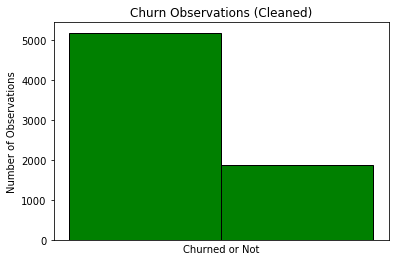

In [23]:
%matplotlib inline
plt.hist(clean_df.Churn, color = "Green", bins = 2, ec = "Black")
plt.xlabel('Churned or Not')
plt.ylabel('Number of Observations')
plt.title ('Churn Observations (Cleaned)')
plt.tick_params(
    axis='x',          
    which='both',     
    bottom='off',      
    top='off',         
    labelbottom='off')
plt.show()

Although there are many other interesting ones, a couple more than I found of particular note are the gender split, which is actually pretty close to even, both in the raw number below and the chart.

In [24]:
print(str(round(clean_df.IsFemale.mean()*100,1)) + '% are female')

49.5% are female


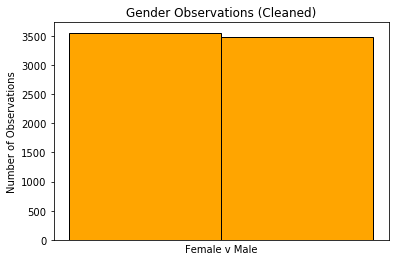

In [25]:
%matplotlib inline
plt.hist(clean_df.IsFemale, color = "Orange", bins = 2, ec = "Black")
plt.xlabel('Female v Male')
plt.ylabel('Number of Observations')
plt.title ('Gender Observations (Cleaned)')
plt.tick_params(
    axis='x',          
    which='both',     
    bottom='off',      
    top='off',         
    labelbottom='off')
plt.show()

If we explore a few visualizations of the interaction of the variables, we can see an interesting number of relationships.

The below visual, a table called an error matrix, shows how likely someone is to churn with being a Senior Citizen with Internet Service.

In [26]:
tbl = pd.pivot_table(clean_df, index = 'SeniorCitizen', columns = 'InternetService', values = 'Churn')
tbl

InternetService,False,True
SeniorCitizen,,
False,0.073270,0.290264
True,0.096154,0.432110


Although this error matrix is a little complicated, one interesting thing that we see is that for when a senior citizen has internet service, they are 43% likely to churn, however, those without internet service have a 9.6% predictability to churn. Although correlation is definitely not causation, this does drive me to believe that we can likely have either senior citizen or internet service as a likely factor towards the final model.

A more boring, yet predictable one is when we look at if they're in contract and and if they have internet services

In [27]:
tbl = pd.pivot_table(clean_df, index = 'InContract', columns = 'InternetService', values = 'Churn')
tbl

InternetService,False,True
InContract,,
False,0.188931,0.464339
True,0.013972,0.092336


If a customer does not have a contract but has internet, they have a 46% chance to churn, but while in contract, less than 10%.

### Applying an Analytic Method

The first method I will be using is the analytic, or descriptive, method called "Hierarchal Clustering". This is a type of clustering that will show how closely related certain selections are.

The first thing I will do is use scipy's wonderful hierarchy subpackage, and build the cluster, using the average distance methodology.



In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
np.set_printoptions(precision=5, suppress=True)
clus = linkage(clean_df, 'average')


I will then test it to see how close my cophenic correlation coefficient is. The closer to 1 it is, the more accurate it will be.

In [29]:
c, coph_dists = cophenet(clus, pdist(clean_df))
c

0.62096680336556231

Although not incredibly close to zero, it should still provide information on what clusters to look at.

Next is to look at the tree diagram, more accurately called a dendrogram. This one is redacted a bit to show only the last few merged clusters.

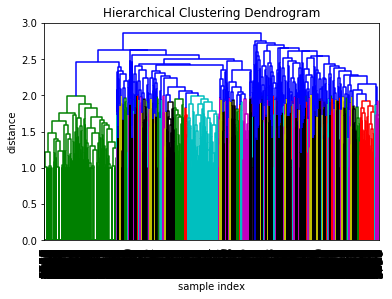

In [30]:
%matplotlib inline
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clus,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

That is not an easy to read diagram! By truncating to the last 10, we should get an idea of what the cluster sizes should be.

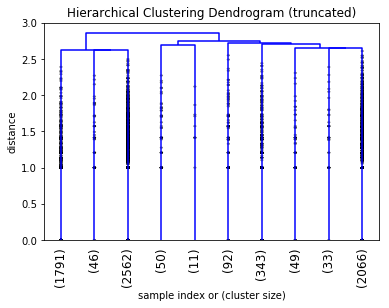

In [31]:
%matplotlib inline
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    clus,
    truncate_mode='lastp', 
    p=10,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

The above chart is a bit hard to determine, but if I observe the last few splits, we can notice some specific changes.

The below are in the form of: [Index 1, Index 2, Distance, Count]

In [32]:
clus[:25]

array([[ 1262.,  6997.,     0.,     2.],
       [ 1910.,  2398.,     0.,     2.],
       [    1.,  2258.,     0.,     2.],
       [  248.,  2303.,     0.,     2.],
       [    4.,   220.,     0.,     2.],
       [    5.,   568.,     0.,     2.],
       [    7.,  3902.,     0.,     2.],
       [    8.,   171.,     0.,     2.],
       [   10.,  1466.,     0.,     2.],
       [   11.,    98.,     0.,     2.],
       [   12.,  2100.,     0.,     2.],
       [   13.,  3085.,     0.,     2.],
       [   15.,   256.,     0.,     2.],
       [   16.,   118.,     0.,     2.],
       [  251.,  1655.,     0.,     2.],
       [ 2081.,  5440.,     0.,     2.],
       [ 2986.,  3425.,     0.,     2.],
       [   37.,  3296.,     0.,     2.],
       [   82.,  1625.,     0.,     2.],
       [  530.,   570.,     0.,     2.],
       [  670.,  7062.,     0.,     3.],
       [   79.,   447.,     0.,     2.],
       [  553.,  7064.,     0.,     3.],
       [ 1076.,  7065.,     0.,     4.],
       [ 1154., 

If we look closely, we can notice that the first time the sample count increases, it pulls two indexes, 670 and 7062, together. The distance between that location and the previous distance shows us how close and far the indicies are. I will do an entire scatter plot, highlighting the location of the indices with relative distance to each other

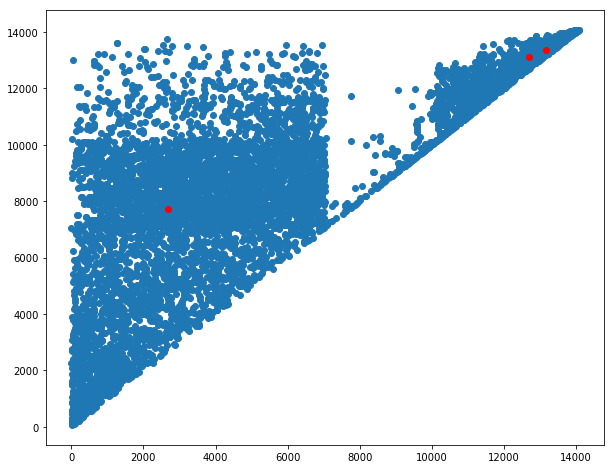

In [33]:
idxs = [6392, 670, 6389]
plt.figure(figsize=(10, 8))
plt.scatter(clus[:,0], clus[:,1])  
plt.scatter(clus[idxs,0], clus[idxs,1], c='r')  
plt.show()

This leads me to believe that it had to make significant hierarchal jumps there, and likely where the last split should be. If we reduce the cluster to two steps. With such a small amount of steps, we can't really see a good clustering, except at indicies 6392 and forward, meaning that this measure provides us limited insight, as customers tend to have almost all the services or only phone.

### Applying an Evaluative Method

The second method I will use is a multiple linear regresison. This can weight the various input to determine the liklelihood of the dependent variable, churn in this case.

This method is very quick to alter, yet can confidently predict as long as the mean squared errors stays low. Automated Neural Networks and Scaled Vector Machines require a lot more interaction to get a comfortably close. Although they are more precise, the Linear Regression method is accurate enough for areas such as marketing and sales, but perhaps fall short on medicine or engineering.

The python library scikit-learn (sklearn) provides many tools to make a linear regression. The first thing I need to do is load the library, and make a slice of the data without the target variable, churn. After this, I can build a linear regression object, and fit the variables to the target.

In [34]:
from sklearn.linear_model import LinearRegression 
iv = clean_df.drop('Churn', axis = 1) #creating only variables
lm = LinearRegression() #instantiating the LinearRegression Object

Next, we will split the data set into a test set and a training set, using SciKit-learn's built in functions. My test set will be 20% of the total data points, and using the random_state of 3, in case I need to reproduce this set. I can then build my linear regression fit off the training data.

In [35]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(iv, clean_df.Churn, test_size = .2, random_state = 3)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

I can take a quick look at the coefficients, and see which ones have a stronger impact. This visualization can show all the coeffficients and their variable names, which makes it easier for humans to explore.

In [36]:
coef_df = pd.DataFrame(list(zip(iv.columns, lm.coef_)), columns = ['Variable', 'Coefficients'])
coef_df.sort_values('Coefficients')

,Variable,Coefficients
13,InContract,-0.206702
6,OnlineSecurity,-0.111569
9,TechSupport,-0.092507
7,OnlineBackup,-0.071019
14,AutomaticPayment,-0.070507
8,DeviceProtection,-0.034228
1,Partner,-0.028327
2,Dependents,-0.020394
15,IsFemale,0.003097
3,PhoneService,0.020126


This shows InContract and Online security having the biggest impact against churn, but having Internet Service being the biggest impact on causing churn. The mean squared errors is:

In [37]:
from sklearn.metrics import mean_squared_error
predict_t = lm.predict(x_train)
mean_squared_error(y_train, predict_t)

0.15014202451961237

.15 is very much an acceptable model, and when we compare it with a test data set

In [38]:
predict_test = lm.predict(x_test)
mean_squared_error(y_test, predict_test)

0.13929247107203294

Which is even lower, meaning my model is very good at predicting whether someone will churn or not, with a heavy look at InternetService and InContract and OnlineSecurity as the biggest variables

## IV. Data Summary

The data provided is discriminating, as it does provide values that can determine the target variable, churn. From the linear regression, we can see that internet service, contract status, and online security all weighed in heavily on the outcome of predicting churn, but that the variables weren't always grouping together, as shown by the lack of discernable analysis in the hierarchal clustering.

Although hierarchal clustering didn't drive any major predictor variables, the linear regression very much did so, including two, Internet Service and InContract that each drove variables multiples higher than their next nearest valued coefficient, and yet almost exactly counter balance each other, showing a significant interaction.

Please note that except for the file provided, no other sources were used.